In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_mldata

import functions as f
import classes as c

In [2]:
mnist_data = fetch_mldata("MNIST original")
X, y = mnist_data["data"], mnist_data["target"]
for i in range(len(X)):
    for j in range(len(X[i])):
        if X[i, j] < 120 and X[i, j] != 0:
            X[i, j] = 0
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train_btmaps = X_train.reshape(-1, 28, 28)
random_index = np.random.choice(len(X_train_btmaps), size=4)

C:\Users\Paul\AppData\Local\conda\conda\envs\handson-ml\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Paul\AppData\Local\conda\conda\envs\handson-ml\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


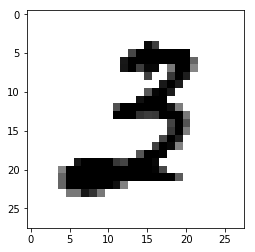

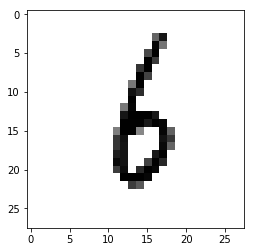

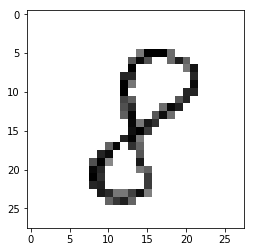

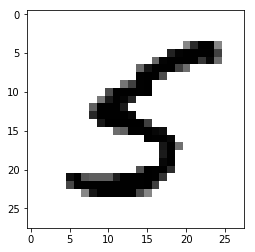

In [3]:
for i, bitmap in enumerate(X_train_btmaps[random_index]):
    plt.figure(i)
    plt.imshow(bitmap, cmap="binary", aspect=1, interpolation="none")
plt.show()

In [ ]:
for y_val in range(10):
    plt.figure(i)
    index = y_train == y_val
    plt.hist(np.sum(X_train[index], axis=1))
plt.show()

In [10]:
X_train_btmaps[0, 4, :]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 159, 253, 159,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [4]:
def color_changes_cnt(btarray):
    changes_cnt = 0
    color = np.ceil(btarray[0]/255)
    for bit in btarray:
        if np.ceil(bit/255) != color:
            changes_cnt = changes_cnt + 1
            color = np.ceil(bit/255)
    return changes_cnt

In [15]:
def color_changes(btmap):
    row_color_changes = []
    for row in btmap:
        row_color_changes.append(color_changes_cnt(row))
    column_color_changes = []
    for column in btmap.T:
        column_color_changes.append(color_changes_cnt(column))
    
    return row_color_changes, column_color_changes

In [17]:
a, b = color_changes(X_train_btmaps[0])

In [18]:
len(a)

28

In [13]:
X_train_btmaps[0, 9, :]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 238, 253,
       253, 190,   0, 253, 228,   0,   0, 255, 168,   0,   0,   0,   0,
         0,   0], dtype=uint8)

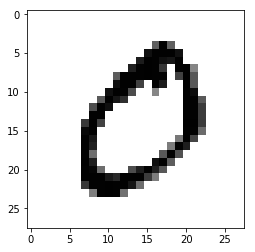

In [14]:
plt.imshow(X_train_btmaps[0], cmap="binary", aspect=1, interpolation="none")